# TP SEMANAL N°3
### Juan Ignacio Jimenez Copati

## *Cálculos*

In [1]:
from IPython.display import IFrame
IFrame("./ts3.pdf", width=960, height=1000)

#### Agregado en reentrega

Para el punto 5 lo que se hizo fue el uso del GIC antoniou para crear un "super capacitor". El principal problema para crear mi filtro solo con capacitores, resistores y opamps era que, al no tener L a masa, no puedo emplear el GIC como un inductor. En vez de eso, lo que se hizo fue utilizar la "transformación de Broton", en donde lo que se hace es conseguir la transformación de mis componentes al dividirlos por la variable compleja "S". Así, las L se volverán R, las R se volverán C y los C tendrán un denominador con S**2

## *Simulación circuital*

Orden:  3


<IPython.core.display.Math object>

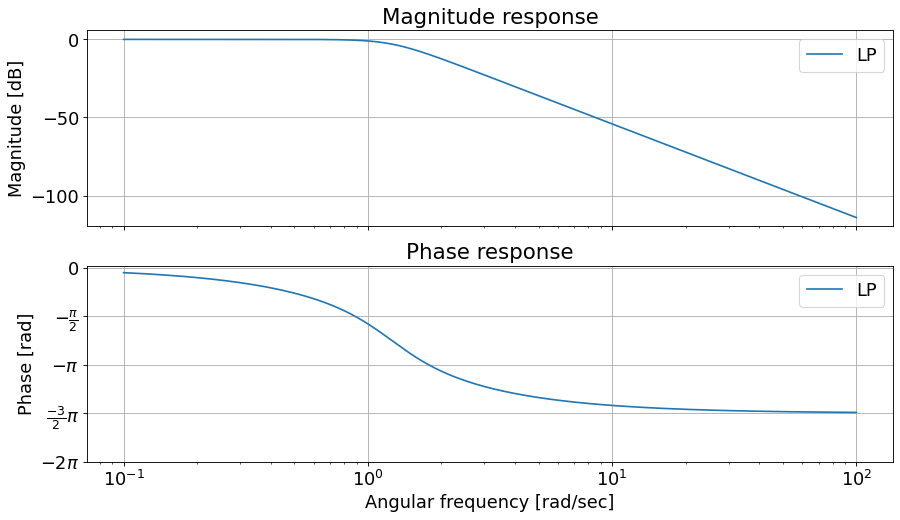

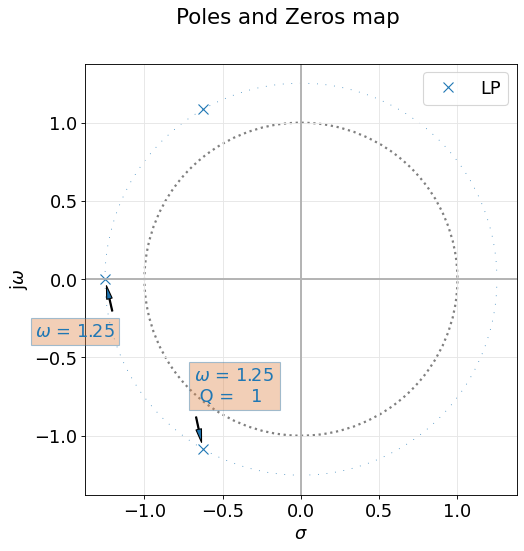

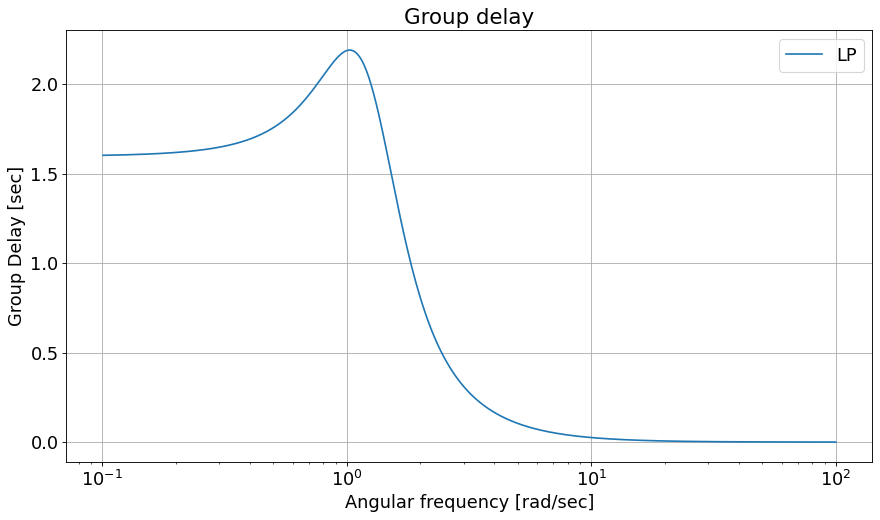

In [2]:
from scipy.signal import TransferFunction     #de el scipy solo exporto la funcion transferfunction
from scipy import signal as sig  
import matplotlib.pyplot as plt               #le doy un nombre (plt) al matplotlib para usarlo más comodamente
import numpy as np                            #le doy un nombre (np) al numpy para usarlo más comodamente
import math as m

##### Librería de TC2
from pytc2.general import print_latex, print_subtitle
import pytc2.sistemas_lineales as tc2 #libreria de la catedra.

#Para graficos

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
mpl.rcParams.update({'font.size':fig_font_size})

wp=1
ws=2
a_max=1
a_min=12

N,wn=sig.buttord(wp, ws, a_max, a_min, True)
num, den = sig.butter(N,  wn, btype='low', analog=True) 
print("Orden: ",N)

H1 = sig.TransferFunction(num,den)
sos = tc2.tf2sos_analog(num, den)



tc2.pretty_print_SOS(sos,'omegayq')
tc2.analyze_sys(H1,"LP")

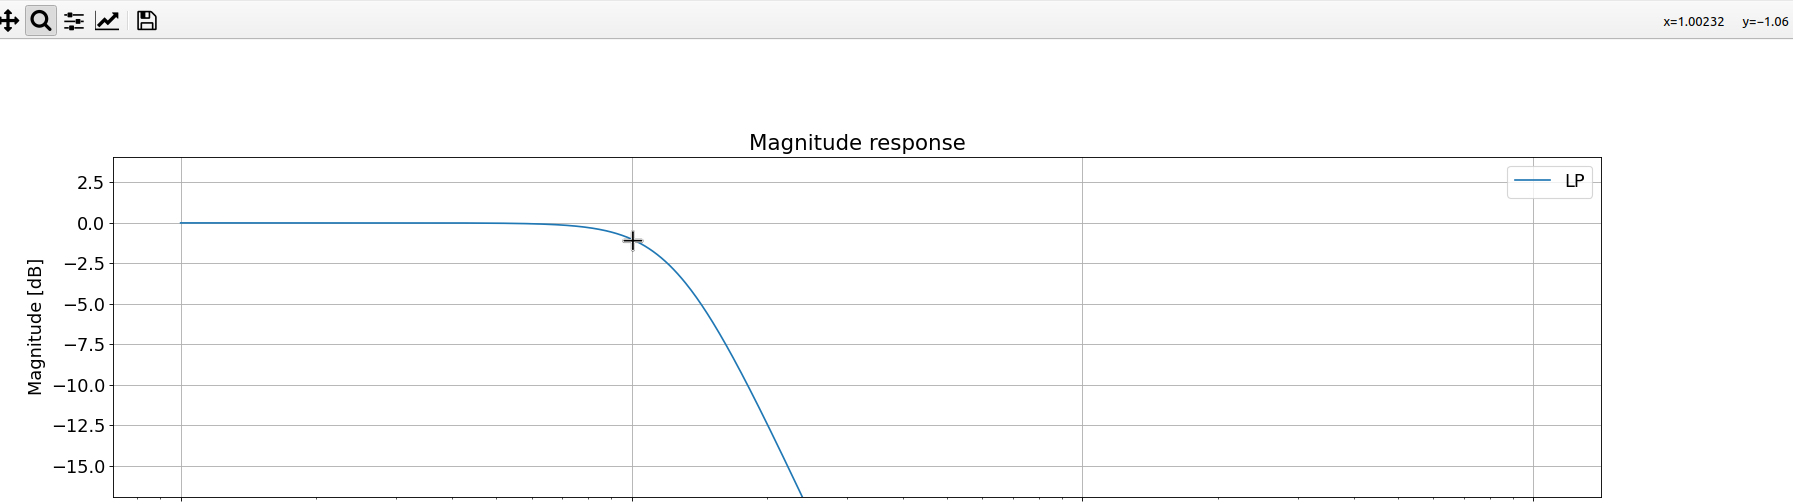

Arriba se ve el cursor en la frecuencia de paso y debajo la de stop

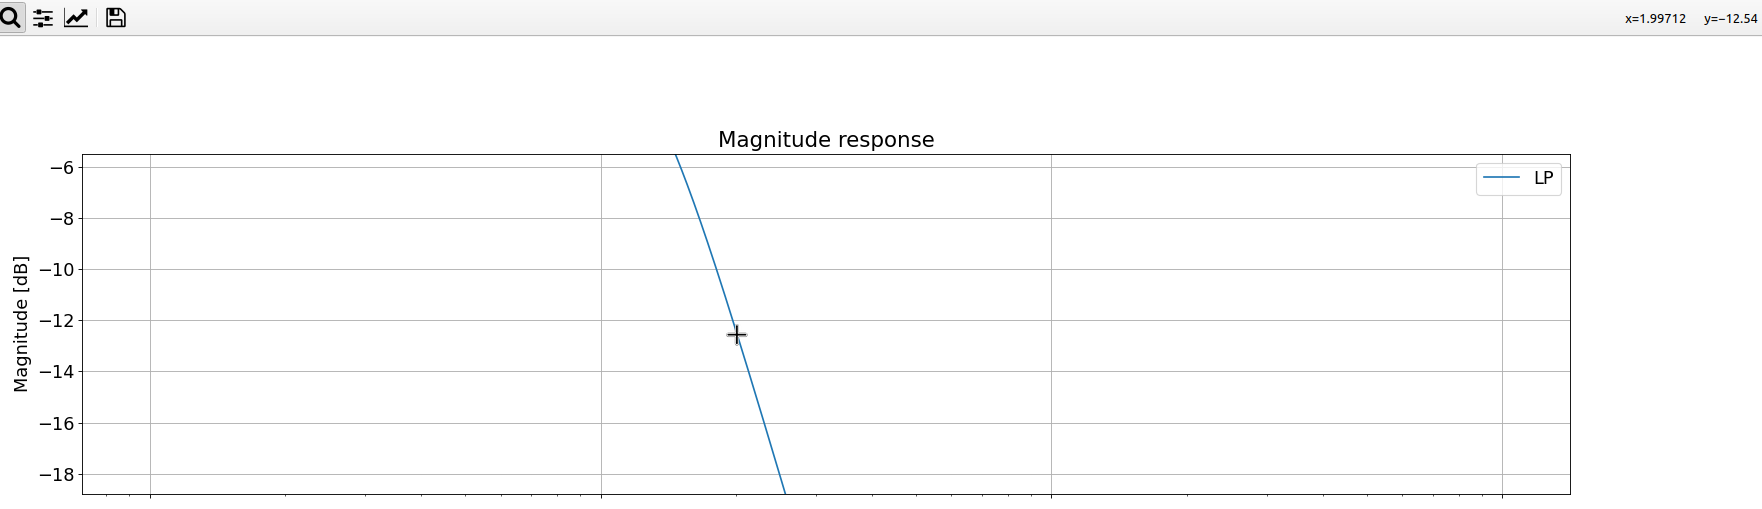

La función usada para la simulación me devuelve el orden y la frecuencia para la que hay -3dB. Luego se la paso a otra que me devuelve el numerador y denominador de la funcion transferencia que cumple con esas especificaciones. Ya que con tan solo darle los datos de la plantilla, los resultados fueron los mismos que los calculados, podemos verificar el correcto análisis. 

El diagrama de polos y ceros también arrojó los datos que calculamos. Un Q=1 y radio de circunferencia de 1.25, exactamente como lo calculado.

 ## *Simulación en LT spice*

### Normalizado según norma Ωω

$$ Ω_ω = 2π . 1500Hz $$

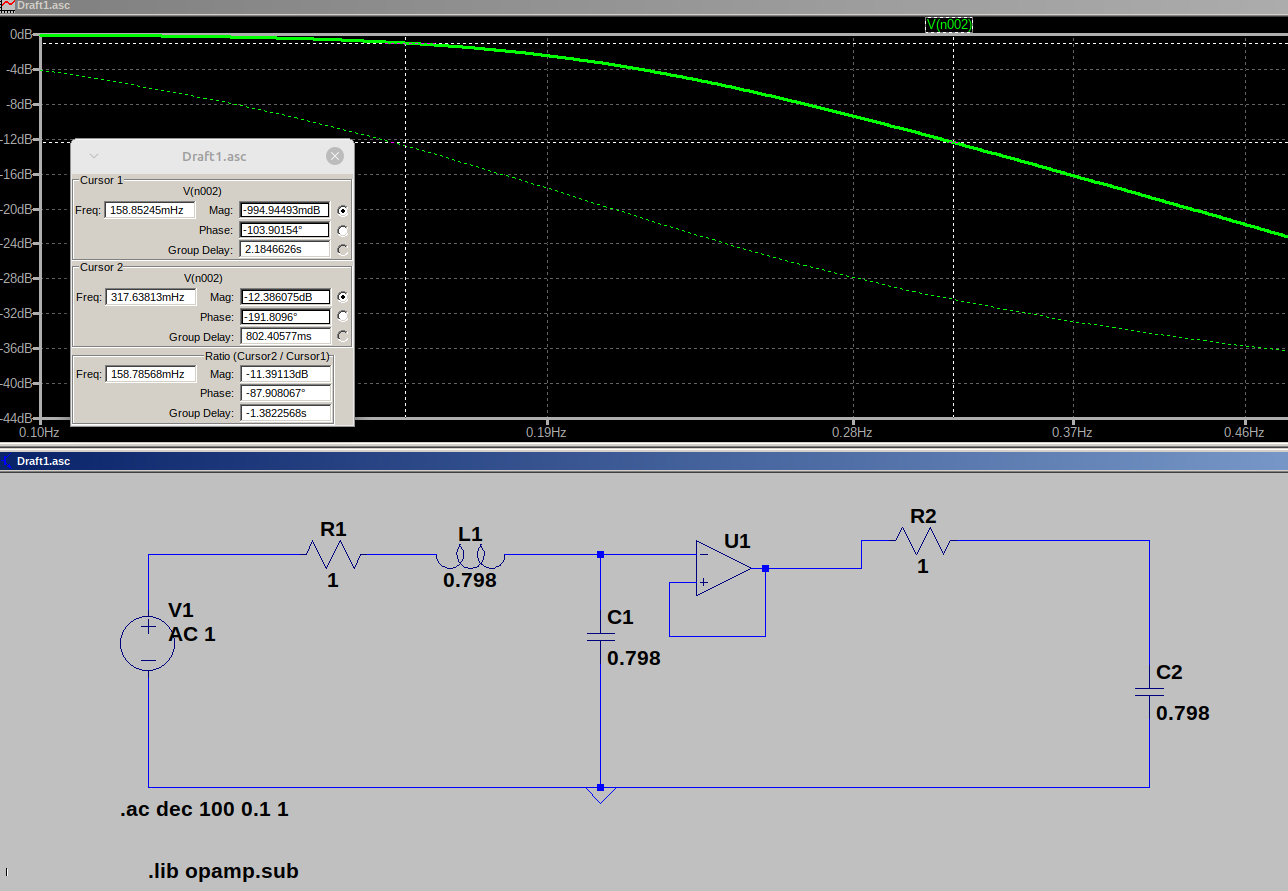

Al tomar de norma R, obtengo un circuitos con valores más simples a la vista y una comprención más fácil. La normalización en frecuencia se hizo teniendo en cuenta mi norma en frecuencia original, que me deja los componentes expresados en función de mi ε. Dada la configuración del circuito, tanto L como C me quedan del mismo valor.

### Desnormalizado según norma ωb

La siguiente simulación se llevó a cabo con los valores desnormalizados con la ωb

$$ Ω_b = ε^{(-1/n)} $$

$$ Ω_ω = 2π . 1500Hz $$

$$ ω_b = Ω_ω . Ω_b$$

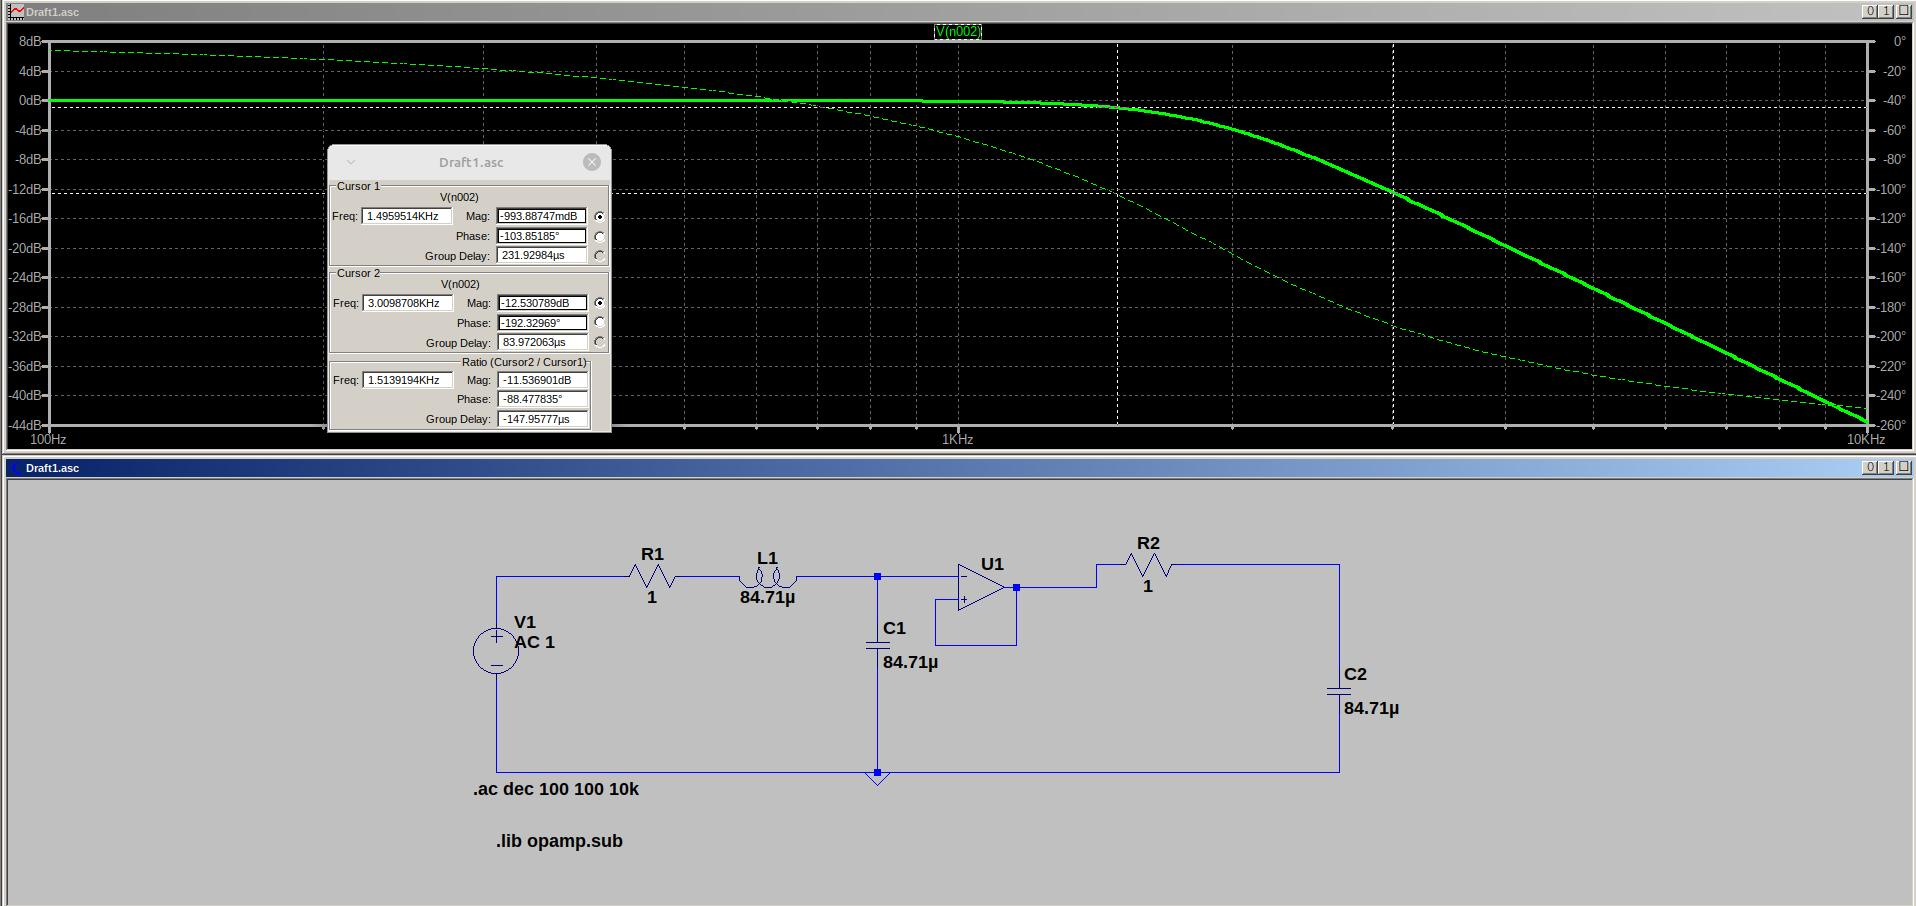

Si ahora desnormalizamos con nuestra norma de frecuencia original, obtendremos valores de componentes que, aunque diferentes, me darán la misma forma de filtrado. Esto se debe a que, con la desnormalización, estoy escalando todos los valores de frecuencia por el mismo coeficiente.

### Desnormalizado según norma ωb y con C=100nf

$$ Ω_z = 847.16 Ω $$

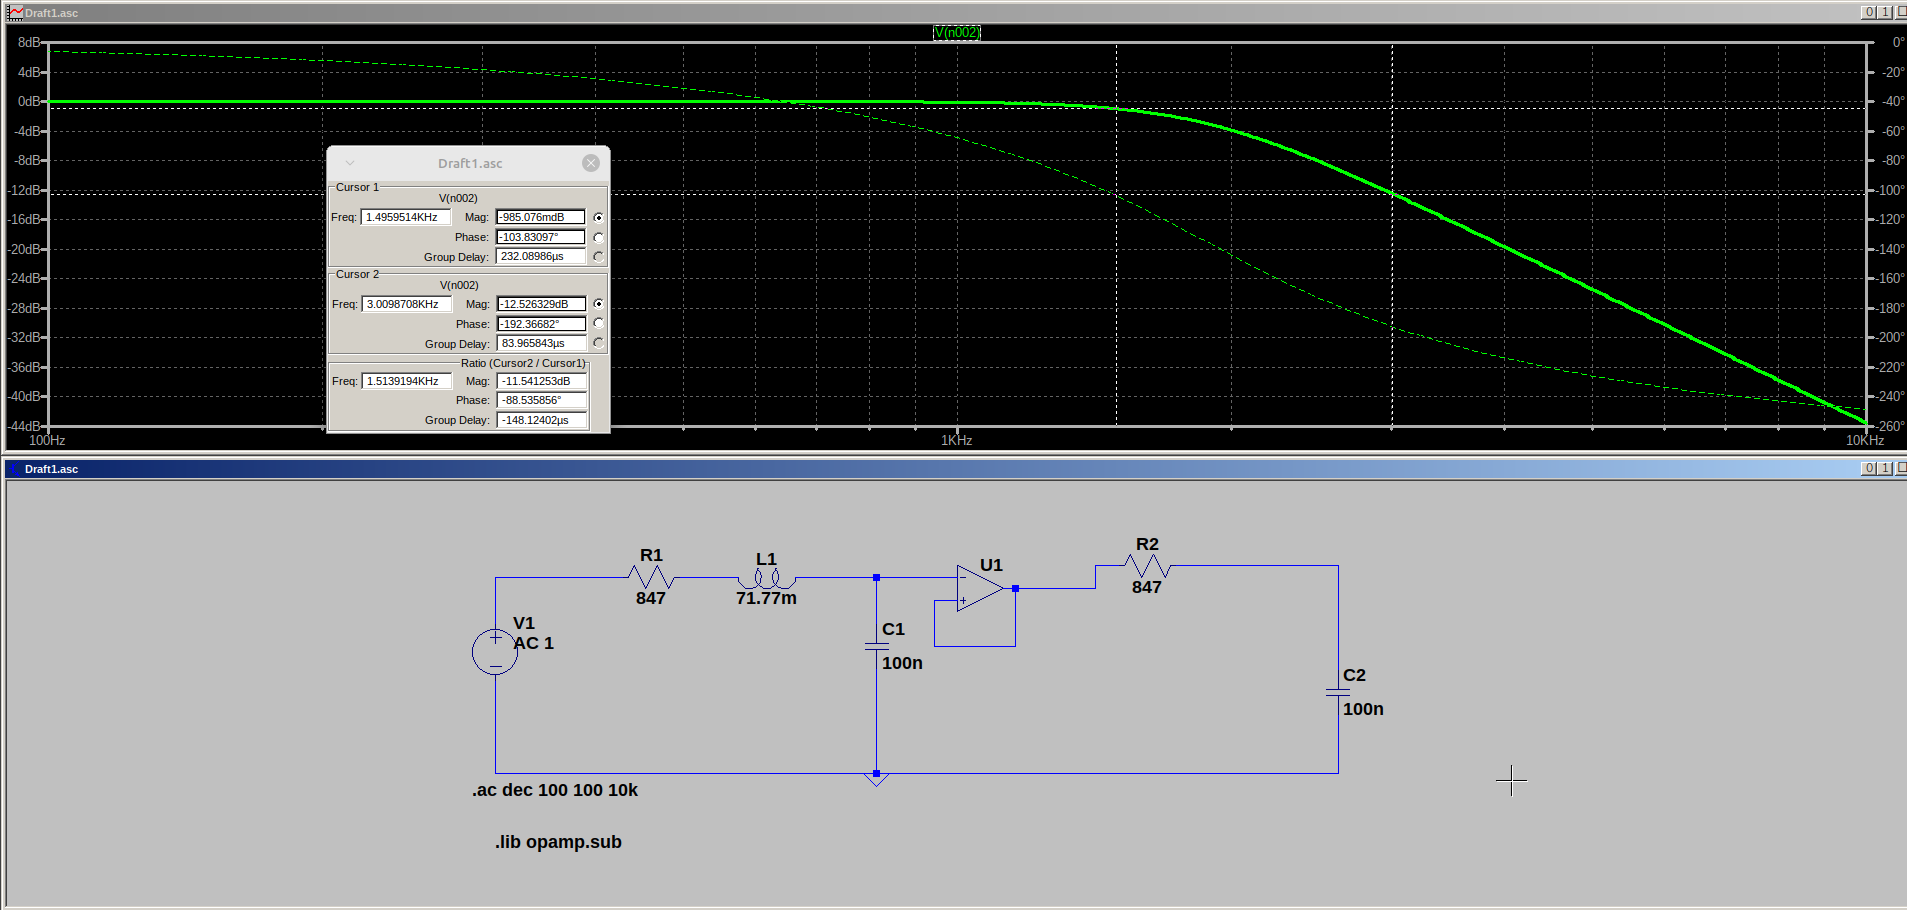

Para meter los capacitores de 100nF que nos otorgan, debo conseguir valores de R y L que cumplan la condicion de mi filtro. Acá es donde entra en juego mi norma de impedancia que hasta ahora había pasado desapercivida. Con el fin de mantener mis frecuencias en su lugar, debo continuar con el ajuste de la norma de impedancia. En el cálculo, empiezo hallando justamente esta norma a partir de la imposición de C=100nF. Luego, con mi valor de norma de impedancia hallado, procedo con el escalamiento de los demás componentes.

## Cambios de reentrega

- Se agregó un punto que faltaba al análisis en papel
- La transformación de Bruton se pudo aplicar para el punto que no disponía de inductores. Antes no sabía como aplicarlo
- Se agregó la simulación numérica 
- Se corrigieron escalas y disposición de los gráficos de LT.